In [1]:
import random
import warnings
import numpy as np
import matplotlib.pyplot as plt
import dataLoader as dl

#from Inner_Speech_Dataset.Plotting.ERPs import 
from Inner_Speech_Dataset.Python_Processing.Data_extractions import  Extract_data_from_subject
from Inner_Speech_Dataset.Python_Processing.Data_processing import  Select_time_window, Transform_for_classificator, Split_trial_in_time
from Inner_Speech_Dataset.Python_Processing.Data_processing import  Calculate_power_windowed
from Inner_Speech_Dataset.Python_Processing.Utilitys import picks_from_channels
from Inner_Speech_Dataset.Python_Processing.Data_processing import Average_in_frec

In [2]:
#Channel name array

def arrToDict(arr):
    dict = {}
    for row in arr:
        dict[row[0]] = row[1]
    
    return dict

def get_channelNames():
    ch_names = np.array(dl.get_channelnames())
    nr = np.arange(ch_names.shape[0])
    ch_names = np.array([ch_names, nr]).T
    ch_names = arrToDict(ch_names)
    return ch_names

def only_spec_channel_data(data , picks):
    
    channel_names_string = picks_from_channels(picks)
    ch_names = get_channelNames()
    channel_nr = []
    for name in  channel_names_string:
        channel_nr.append(int(ch_names[name]))
        #print(ch_names[name])

    channel_nr = np.array(channel_nr)
    
    #print(channel_nr)
    #data = np.swapaxes(data, 0, 1)
    #labels = np.swapaxes(labels, 0, 1)
    #for channelnrs in channels:
    data2 = np.delete(data, np.delete(np.arange(128), channel_nr) , axis=1)
    return data2


def get_power_array(split_data , samplingRate, trialSplit = 2,):

    #trialSplit = 16
    sR = samplingRate #samplingRate = 32
    data_power = np.zeros([split_data.shape[0], split_data.shape[1], trialSplit, 2])
    for t, trial in enumerate(split_data,0):
        for c, channel in enumerate(trial,0):
            for x in range(trialSplit):
                data_power[t, c, x, : ] = Calculate_power_windowed(channel, fc=sR, window_len=1*4/trialSplit, window_step=1*4/trialSplit, t_min=0, t_max=4/trialSplit * x + 4/trialSplit)
    

    #m_power , std_power
    #print(data_power.shape)
    return data_power
    


#Loading the data and labels from EEG and EXG

# data1, labels1 = dl.load_data(datatype="EEG", subject_nr=1, verbose=True,sampling_rate=sampling_rate) 
# data2, labels2 = dl.load_data(datatype="EEG", subject_nr=2 ,verbose=True,sampling_rate=sampling_rate )
# data4 , labels4 = dl.load_data(datatype="EEG", subject_nr=4, verbose=True,sampling_rate=sampling_rate) 

# dataX, labelsX = dl.load_data(datatype="EXG", verbose=False) 
# #datab, labelsb = dl.load_data(datatype="baseline", verbose=False, sampling_rate=32) 
# #dl.load_data(datatype2=2) #4.5 is max

####

#data = np.concatenate([data1, data2, data4], axis = 0)
#labels1d = np.concatenate([labels1, labels2, labels4], axis = 0)

####

#data = data1
#labels1d = labels1

sampling_rate = 128
data, labels = dl.load_multiple_datasets(nr_of_datasets=2, sampling_rate=128)
ch_names = get_channelNames()

data = only_spec_channel_data(data, "OPZ")
print(data.shape)

data_p =  get_power_array(data, sampling_rate, trialSplit=32)
print(data_p.shape)


Data shape: [trials x channels x samples]
(500, 128, 640)
Labels shape
(500, 4)
Final data shape
(100, 128, 640)
Final labels shape
(100,)
Up is 0.0 and Down is 1.0


In [ ]:
def get_local_frequency(split_data , samplingRate, trialSplit = 2,):

    #trialSplit = 16
    sR = samplingRate #samplingRate = 32
    data_power = np.zeros([split_data.shape[0], split_data.shape[1], trialSplit, 2])
    for t, trial in enumerate(split_data,0):
        for c, channel in enumerate(trial,0):
            for x in range(trialSplit):
                data_power[t, c, x, : ] = Calculate_power_windowed(channel, fc=sR, window_len=1*4/trialSplit, window_step=1*4/trialSplit, t_min=0, t_max=4/trialSplit * x + 4/trialSplit)
    

    #m_power , std_power
    #print(data_power.shape)
    return data_power
    

[ 0.       0.15625  0.3125   0.46875  0.625    0.78125  0.9375   1.09375
  1.25     1.40625  1.5625   1.71875  1.875    2.03125  2.1875   2.34375
  2.5      2.65625  2.8125   2.96875  3.125    3.28125  3.4375   3.59375
  3.75     3.90625  4.0625   4.21875  4.375    4.53125  4.6875   4.84375
  5.       5.15625  5.3125   5.46875  5.625    5.78125  5.9375   6.09375
  6.25     6.40625  6.5625   6.71875  6.875    7.03125  7.1875   7.34375
  7.5      7.65625  7.8125   7.96875  8.125    8.28125  8.4375   8.59375
  8.75     8.90625  9.0625   9.21875  9.375    9.53125  9.6875   9.84375
 10.      10.15625 10.3125  10.46875 10.625   10.78125 10.9375  11.09375
 11.25    11.40625 11.5625  11.71875 11.875   12.03125 12.1875  12.34375
 12.5     12.65625 12.8125  12.96875 13.125   13.28125 13.4375  13.59375
 13.75    13.90625 14.0625  14.21875 14.375   14.53125 14.6875  14.84375
 15.      15.15625 15.3125  15.46875 15.625   15.78125 15.9375  16.09375
 16.25    16.40625 16.5625  16.71875 16.875   17.03

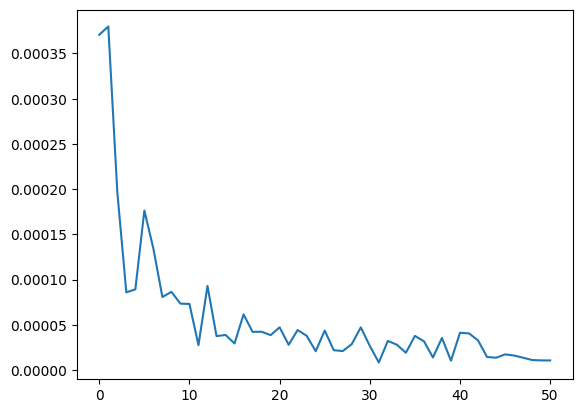

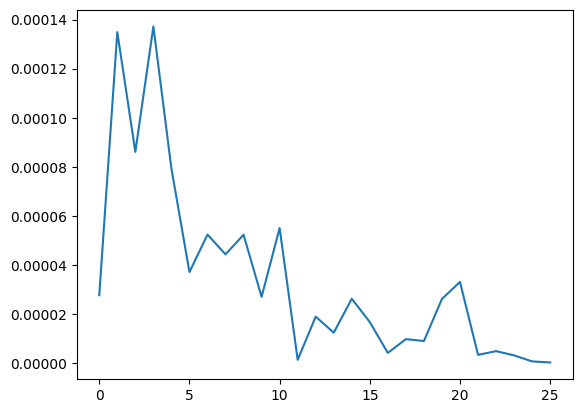

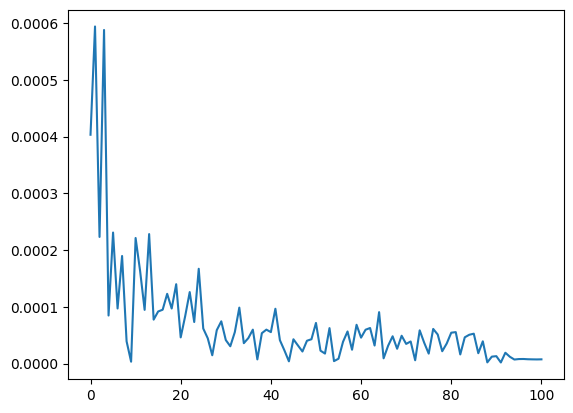

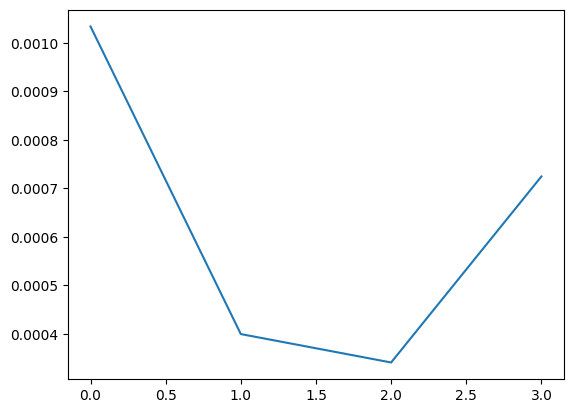

In [ ]:
#Features that need extracting
#Frequency, power
# from scipy.fft import rfft, ifft, fftshift, fftfreq
# y=abs(rfft(data[1,1],100))
# y2=abs(rfft(data[1,1],50))
# y3=abs(rfft(data[1,1],200))
# #print(fftfreq(640, 1/100)[:640//2])
# print(fftfreq(640, 1/100)[:640//2])
# test = []
# freq2 = 0
# x=0
# z=0
# bands = [[0,4],[4,7], [8,12], [12,30], [30,100]]
# for freq in y:
#     x +=1
#     freq2 += freq
#     if x==bands[z][1]:
#         z+=1
#         test.append(freq2)
#         freq2 = 0
#     elif x < bands[z][0]:
#         freq2 = 0
#     if z == len(bands):
#         break
# #test.append(freq2)    
# print(len(test))
# #Average_in_frec(data_p[1,1], y, [[10,10]])

# #print(abs(y[2]))
# plt.figure()
# plt.plot(y)
# plt.figure()
# plt.plot(y2)
# plt.figure()
# plt.plot(y3)
# #plt.figure()
# #plt.plot(abs(y2))
# plt.figure()
# plt.plot(test)

In [ ]:
#Splitting into training and test data
#print(labels)


order = np.arange(labels.shape[0])
np.random.shuffle(order)

temp_data = np.zeros(data.shape)
temp_labels = np.zeros(labels.shape)

for x in range(labels.shape[0]):
    i = order[x]
    
    temp_data[x] = data[i]
    temp_labels[x] = labels[i]

data = temp_data
labels = temp_labels

data_train, data_test = np.split(data, indices_or_sections=[int(labels.shape[0]*0.75)],axis=0)
labels_train, labels_test = np.split(labels, indices_or_sections=[int(labels.shape[0]*0.75)],axis=0)
print(labels_train.shape)
print(data_test.shape)




(165, 2)
(55, 5, 640)


In [ ]:
#Convolution part

# Do the convs like I wrote in the Note
# First need to find out 8 best channels
#  Utilities can help average similar channels
# Read through article and how they did it better!
# convlayer = tf.keras.layers.Conv2D(4,
#  kernel_size=[2,1], input_shape= (data_train.shape[0], data_train.shape[1] , data_train.shape[2], 1,), 
#  padding="valid", strides=[round(data_train.shape[1]),1],
#  activation="relu")


# print(data_train.shape)
# print(data_test.shape)

# #data_train = np.swapaxes(data_train, 2, 1)
# #data_test = np.swapaxes(data_test, 2, 1)
# print(data_train.shape)
# print(data_test.shape)
# data_train = np.expand_dims(data_train, axis=0)
# data_test = np.expand_dims(data_test, axis=0)
# data_train = np.moveaxis(data_train, 0, -1)
# data_test = np.moveaxis(data_test, 0, -1)

# conv_data_train = convlayer(data_train)
# conv_data_test = convlayer(data_test)

# data_train = conv_data_train
# data_test = conv_data_test

# #data_train = np.swapaxes(data_train, 2, 1)
# #data_test = np.swapaxes(data_test, 2, 1)


# data_train = np.squeeze(np.moveaxis(data_train, -1, 0))
# data_test = np.squeeze(np.moveaxis(data_test, -1, 0))
# print(data_train.shape)
# print(data_test.shape)

In [ ]:


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

tf.keras.backend.clear_session()





eeg_model = tf.keras.Sequential([
    layers.Flatten(input_shape = (data_train.shape[1],data_train.shape[2])),
    layers.Dense(units=data_train.shape[1]*data_train.shape[2], activation="relu"),
    layers.Dense(units=1000, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(units=200, activation="relu"),
    layers.Dropout(0.2),
    #layers.Flatten(input_shape = (5,160)),
    layers.Dense(units=2, activation="softmax")


])
eeg_model.build()
eeg_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 1600)              2561600   
                                                                 
 dense_1 (Dense)             (None, 1000)              1601000   
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_2 (Dense)             (None, 200)               200200    
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_3 (Dense)             (None, 2)                 4

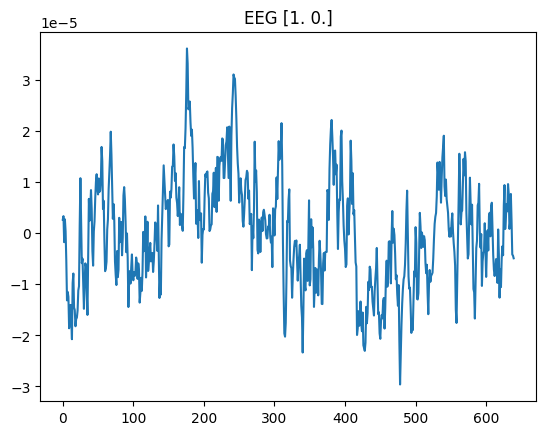

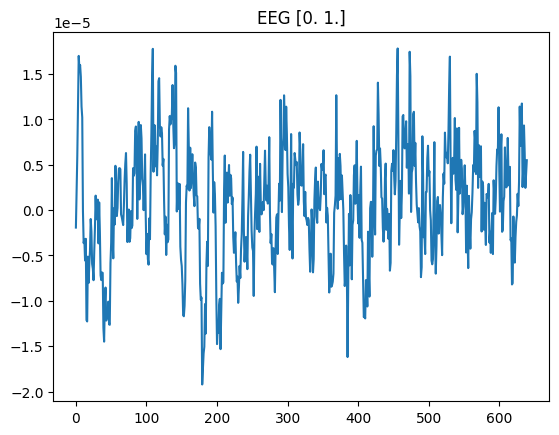

In [ ]:
for trialNr, trial in enumerate(data_train[44:46],1):
    for channel in trial[1:2]:
        plt.figure()
        plt.plot(channel)
        plt.title("EEG {}".format(labels_train[trialNr]))

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
tensorboard_callback = tf.keras.callbacks.TensorBoard(histogram_freq=2)

eeg_model.compile(optimizer='adam',
              loss="binary_crossentropy",
              metrics=['accuracy'])

outputs = eeg_model.fit(data_train, labels_train, callbacks=[callback, tensorboard_callback],epochs=10)

print("Results")
eeg_model.evaluate(data_test, labels_test)
result = eeg_model.predict(data_test)


Epoch 1/10
24/24 [==============================] - 2s 52ms/step - loss: 0.6937 - accuracy: 0.5093
Epoch 2/10
24/24 [==============================] - 1s 25ms/step - loss: 0.6933 - accuracy: 0.5185
Epoch 3/10
24/24 [==============================] - 1s 50ms/step - loss: 0.6930 - accuracy: 0.5159
Epoch 4/10
24/24 [==============================] - 1s 24ms/step - loss: 0.6930 - accuracy: 0.5159
Epoch 5/10
24/24 [==============================] - 1s 50ms/step - loss: 0.6933 - accuracy: 0.5159
Epoch 6/10
24/24 [==============================] - 1s 25ms/step - loss: 0.6929 - accuracy: 0.5159
Epoch 7/10
24/24 [==============================] - 1s 48ms/step - loss: 0.6929 - accuracy: 0.5159
Epoch 8/10
24/24 [==============================] - 1s 24ms/step - loss: 0.6930 - accuracy: 0.5159
Results
8/8 [==============================] - 0s 6ms/step


In [ ]:
result2 = []
print(result)
for res in result:
    x = np.maximum(res[0], res[1])
    result2.append(int(np.where(res == x)[0]))

result2 = np.array(result2)
print(result2)

[[0.4693958  0.5306042 ]
 [0.46939772 0.5306022 ]
 [0.46939963 0.53060037]
 [0.4694023  0.53059775]
 [0.4693997  0.53060037]
 [0.46939665 0.5306033 ]
 [0.469398   0.53060204]
 [0.4693963  0.5306037 ]
 [0.46939713 0.5306028 ]
 [0.46939898 0.53060097]
 [0.46939468 0.5306053 ]
 [0.469399   0.53060097]
 [0.46939477 0.53060526]
 [0.46940175 0.5305983 ]
 [0.46939644 0.5306035 ]
 [0.4693968  0.5306032 ]
 [0.46940017 0.5305999 ]
 [0.4693952  0.5306048 ]
 [0.46939963 0.53060037]
 [0.4694058  0.53059417]
 [0.4693995  0.5306004 ]
 [0.4693991  0.53060097]
 [0.46939862 0.53060144]
 [0.46939734 0.53060263]
 [0.46939886 0.5306011 ]
 [0.4693992  0.53060085]
 [0.4693974  0.53060263]
 [0.46940023 0.5305998 ]
 [0.46939775 0.5306023 ]
 [0.469398   0.530602  ]
 [0.46939886 0.53060114]
 [0.46939662 0.53060335]
 [0.4693958  0.53060424]
 [0.46939704 0.530603  ]
 [0.46939552 0.5306044 ]
 [0.469398   0.530602  ]
 [0.46939513 0.53060484]
 [0.46939564 0.5306043 ]
 [0.46939874 0.5306012 ]
 [0.46939862 0.5306014 ]


In [ ]:


for trialNr, trial in enumerate(data[44:46],44):
    for channel in trial[5:6]:
        plt.figure()
        plt.plot(channel)
        plt.title("EEG {}".format(labels[trialNr]))

      